#### Calling Dependencies and Set Lat/Long Range

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import openweathermapy.core as owm
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


#### Generate City list
1. Use numpy.random to generate coordinates 
2. Put the cities in a list

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

647

#### Retrieve data from API
1. Set up variables for API call
2. For loop to go through each json item
3. try/except included in case city is not in API
4. print log for each city retrieved

In [3]:

settings = {"units": "imperial", "appid": api_key}
citydata = []
print("Beginning Data Retrieval")
print("-----------------------------")
recordcount = 1
setcount = 1
for city in cities:
    try:
        weather = owm.get_current(city,**settings)
        cityname = weather['name']
        citydata.append(weather)
        print("Processing Record {} of Set {} | {}".format(recordcount,setcount,cityname))
        if recordcount <50:
            recordcount = recordcount+1
        else:
            setcount = setcount+1
            recordcount =1   
    except:
        print("City not found. Skipping... ")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | Punta Arenas
Processing Record 2 of Set 1 | Ushuaia
Processing Record 3 of Set 1 | Rikitea
Processing Record 4 of Set 1 | Port Elizabeth
Processing Record 5 of Set 1 | Avarua
Processing Record 6 of Set 1 | Jamestown
Processing Record 7 of Set 1 | Narathiwat
Processing Record 8 of Set 1 | Mar del Plata
City not found. Skipping... 
Processing Record 9 of Set 1 | Gwembe
Processing Record 10 of Set 1 | Te Anau
Processing Record 11 of Set 1 | Kodiak
Processing Record 12 of Set 1 | Upernavik
Processing Record 13 of Set 1 | Hilo
Processing Record 14 of Set 1 | New Norfolk
Processing Record 15 of Set 1 | Mitu
Processing Record 16 of Set 1 | Saint-Philippe
Processing Record 17 of Set 1 | Nioki
Processing Record 18 of Set 1 | Vaini
Processing Record 19 of Set 1 | Harper
Processing Record 20 of Set 1 | Hobart
Processing Record 21 of Set 1 | Aguimes
Processing Record 22 of Set 1 | Katsuura
Processing Record 23 of

#### Create DataFrame
1. Set up a list for each column
2. Append values for each city into the lists
3. Make a dict of all the cities and values
4. Convert dict to DataFrame

In [4]:
citylist =[]
cloudlist = []
countrylist = []
datelist = []          
humiditylist = []    
latlist = []          
lnglist = []          
maxtemplist = []      
windspeedlist = []
for city in citydata:
    citylist.append(city['name'])
    cloudlist.append(city['clouds']['all'])
    countrylist.append(city['sys']['country'])
    datelist.append(city['dt'])
    humiditylist.append(city['main']['humidity'])
    latlist.append(city['coord']['lat'])
    lnglist.append(city['coord']['lon'])
    maxtemplist.append(city['main']['temp_max'])
    windspeedlist.append(city['wind']['speed'])
df = {"City":citylist,"Cloudiness":cloudlist,"Country":countrylist,"Date":datelist,"Humidity":humiditylist,"Lat":latlist,"Lng":lnglist,"Max Temp":maxtemplist,"Wind Speed":windspeedlist}
weatherdf = pd.DataFrame.from_dict(df)
weatherdf.to_csv(path_or_buf="output_data/cities.csv",index=False)
weatherdf.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Punta Arenas,90,CL,1554243752,87,-53.16,-70.91,46.40,14.99
1,Ushuaia,75,AR,1554242400,61,-54.81,-68.31,46.40,9.17
2,Rikitea,0,PF,1554244928,100,-23.12,-134.97,75.63,16.02
3,Port Elizabeth,90,US,1554244910,70,39.31,-74.98,46.99,14.99
4,Avarua,0,CK,1554242400,69,-21.21,-159.78,82.40,12.75


#### Make Lat vs. Max Temp Graph
1. Set scatter vars and colors
2. Set X label
3. Set Y label
4. Set title
5. Set gridlines
6. Save Figure

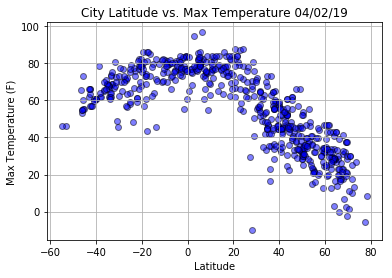

In [5]:
plt.scatter(weatherdf['Lat'],weatherdf['Max Temp'],edgecolors='black',facecolors='blue',alpha=.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature 04/02/19")
plt.grid(b=True)
plt.savefig("output_data/Lat_vs_Temp")

#### Use method above for Lat vs. Humidity

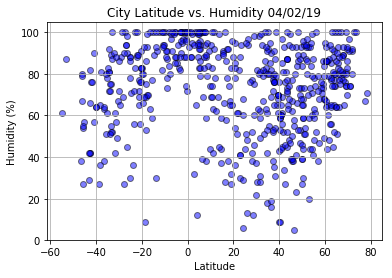

In [6]:
plt.scatter(weatherdf['Lat'],weatherdf['Humidity'],edgecolors='black',facecolors='blue',alpha=.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity 04/02/19")
plt.grid(b=True)
plt.savefig("output_data/Lat_vs_Humidity")

#### Use method above for Lat vs. Clouidiness

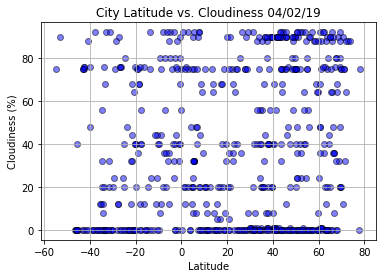

In [7]:
plt.scatter(weatherdf['Lat'],weatherdf['Cloudiness'],edgecolors='black',facecolors='blue',alpha=.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness 04/02/19")
plt.grid(b=True)
plt.savefig("output_data/Lat_vs_Cloudiness")

#### Use method above for Lat vs. Wind Speed

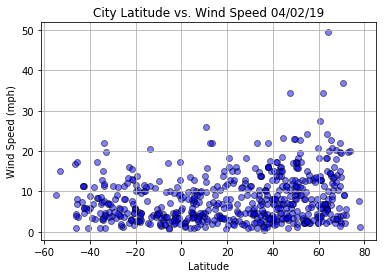

In [8]:
plt.scatter(weatherdf['Lat'],weatherdf['Wind Speed'],edgecolors='black',facecolors='blue',alpha=.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed 04/02/19")
plt.grid(b=True)
plt.savefig("output_data/Lat_vs_Wind")